In [8]:
import numpy as np
import pickle
from itertools import combinations
import matplotlib.pyplot as plt
import sys
sys.path.append("..") # Adds higher directory to python modules path.
from dataset import get_loaders

In [9]:
with open('../../results/results_rnn_regs.P', 'rb') as f:
    results = pickle.load(f)
results = results['Cortical']['analysis'] 

In [10]:
reg_results = results['reg_results']
cat_regs = reg_results['cat_regs']
con_regs = reg_results['con_regs']

In [16]:
data = get_loaders(batch_size=32, meta=False,
                    use_images=True, image_dir='../images/',
                    n_episodes=None)
train_data, train_loader, test_data, test_loader, analyze_data, analyze_loader = data
n_states = test_data.n_states 
loc2idx = test_data.loc2idx 
idxs = [idx for idx in range(n_states)]
locs = [loc for loc, idx in loc2idx.items()]


In [17]:
run = -1
cp = -1

In [18]:
y_hat_Es = con_regs['y_hat_Es'] # [runs, checkpoints, n_combinations]: [2, 11, 120]
ys = con_regs['ys'] 

wE = ys - y_hat_Es
wE = wE[run][cp]

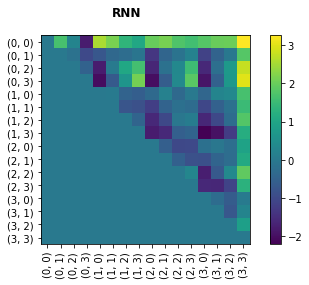

In [38]:
fig, axs = plt.subplots()
rsa_dist = np.zeros(shape=(n_states, n_states))
for i, (idx1, idx2) in enumerate(combinations(idxs, 2)):
    rsa_dist[idx1][idx2] = wE[i]

plt.imshow(rsa_dist)
plt.xticks(idxs, locs, rotation='90')
plt.yticks(idxs, locs)
plt.colorbar()
fig_str = 'rsa_rnn'
fig.suptitle('RNN', fontweight='bold')
plt.tight_layout()   
fig.savefig(('../../figures/' + fig_str + '.pdf'),
            bbox_inches = 'tight', pad_inches=0)
